In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

In [7]:
df = pd.read_csv('Flight_Price_Prediction/Clean_Dataset.csv', index_col= 0)

In [43]:
df.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [8]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [12]:
# 도착 나라별 비행기 가격 최소값을 보이시오 

In [14]:
df['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [29]:
df.groupby('destination_city').min()

,airline,flight,source_city,departure_time,stops,arrival_time,class,duration,days_left,price
destination_city,,,,,,,,,,
Bangalore,AirAsia,6E-102,Chennai,Afternoon,one,Afternoon,Business,0.83,1,1443
Chennai,AirAsia,6E-102,Bangalore,Afternoon,one,Afternoon,Business,0.83,1,1543
Delhi,AirAsia,6E-123,Bangalore,Afternoon,one,Afternoon,Business,1.83,1,2051
Hyderabad,AirAsia,6E-128,Bangalore,Afternoon,one,Afternoon,Business,1.00,1,1105
Kolkata,AirAsia,6E-102,Bangalore,Afternoon,one,Afternoon,Business,1.75,1,2056
Mumbai,AirAsia,6E-113,Bangalore,Afternoon,one,Afternoon,Business,1.25,1,1830


In [30]:
# 도착 나라별 비행기 가격 최대값을 보이시오 

In [31]:
df.groupby('destination_city').max()

,airline,flight,source_city,departure_time,stops,arrival_time,class,duration,days_left,price
destination_city,,,,,,,,,,
Bangalore,Vistara,UK-996,Mumbai,Night,zero,Night,Economy,49.83,49,114523
Chennai,Vistara,UK-996,Mumbai,Night,zero,Night,Economy,47.75,49,111964
Delhi,Vistara,UK-996,Mumbai,Night,zero,Night,Economy,41.58,49,123071
Hyderabad,Vistara,UK-996,Mumbai,Night,zero,Night,Economy,41.83,49,114705
Kolkata,Vistara,UK-996,Mumbai,Night,zero,Night,Economy,44.50,49,117307
Mumbai,Vistara,UK-995,Kolkata,Night,zero,Night,Economy,40.92,49,115211


In [37]:
# 시간이 가장 오래 걸리는 비행편을 보이시오 

In [40]:
df.loc[ df['duration'].max() == df['duration'] ,]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538


In [ ]:
# 시간이 가장 적게 걸리는 비행편을 보이시오 

In [42]:
df.loc[ df['duration'].min() == df['duration'] ,].head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
115869,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,6,3498
115943,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,7,3498
116010,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,8,3498


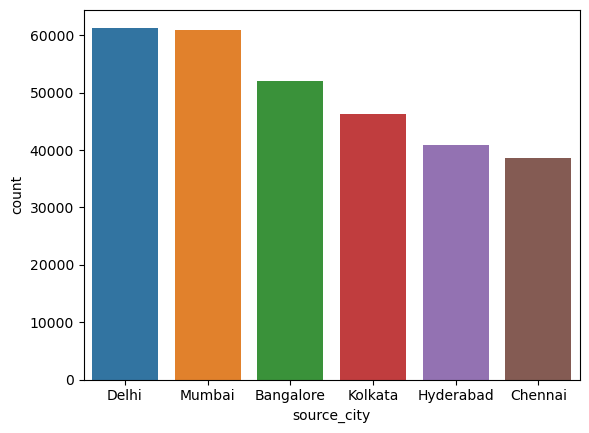

In [44]:
# 출발지 개수 비교하기
sb.countplot(data= df , x= 'source_city')
plt.show()

In [45]:
# 상관계수 확인
df.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


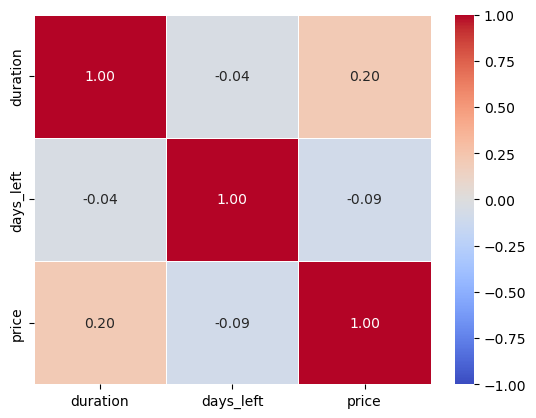

In [79]:
sb.heatmap(data=df.corr() , annot=True , fmt='.2f' , cmap='coolwarm' , vmin= -1 , vmax=1 , linewidths=0.5 )
plt.show()

In [69]:
# 카테고리컬 데이터 개수 확인 
df['airline'].nunique()

6

In [70]:
df['flight'].nunique()

1561

In [71]:
df['source_city'].nunique()

6

In [72]:
df['departure_time'].nunique()

6

In [73]:
df['stops'].nunique()

3

In [74]:
df['arrival_time'].nunique()

6

In [75]:
df['destination_city'].nunique()

6

In [76]:
df['class'].nunique()

2

In [66]:
# One Hot Encoding
X = df
X

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [78]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer( [ ( 'encoder' ,OneHotEncoder() , [0,1,2,3,4,5,6,7] ) ] , remainder ='passthrough')
ct.fit_transform(X)

<300153x1599 sparse matrix of type '<class 'numpy.float64'>'
	with 3301683 stored elements in Compressed Sparse Row format>

In [50]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [62]:


y = df.loc[ : ,'price'].to_frame()

In [61]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y,test_size = 0.2 ,random_state=1 )
X_train 

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
46891,Indigo,6E-5013,Mumbai,Early_Morning,zero,Early_Morning,Delhi,Economy,2.08,22,2339
258371,Vistara,UK-864,Bangalore,Evening,one,Afternoon,Hyderabad,Business,17.25,40,37985
263532,Vistara,UK-776,Kolkata,Evening,one,Morning,Delhi,Business,17.42,41,68303
241856,Vistara,UK-930,Mumbai,Early_Morning,one,Night,Chennai,Business,15.25,7,64173
202730,Indigo,6E-7185,Chennai,Morning,one,Afternoon,Hyderabad,Economy,5.33,3,11101
...,...,...,...,...,...,...,...,...,...,...,...
21440,Indigo,6E-397,Delhi,Afternoon,one,Evening,Kolkata,Economy,5.25,9,18555
117583,Vistara,UK-850,Bangalore,Evening,one,Morning,Chennai,Economy,15.92,26,4792
73349,Indigo,6E-6809,Mumbai,Evening,one,Night,Hyderabad,Economy,5.67,23,3891
267336,Air_India,AI-526,Kolkata,Evening,one,Afternoon,Bangalore,Business,19.33,2,40862


In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()


In [58]:
regressor.fit(X_train,y_train)

ValueError: could not convert string to float: 'Indigo'